In [1]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from scipy import stats
from numpy.linalg import inv
import pandas as pd

from MMA_QENS.core import Minimal_Model

In [3]:
dir(Minimal_Model)

['Deconvolve',
 'Fitting',
 'Resample',
 'Sym_Norm',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

<>:27: SyntaxWarning: invalid escape sequence '\h'
<>:27: SyntaxWarning: invalid escape sequence '\o'
<>:27: SyntaxWarning: invalid escape sequence '\h'
<>:27: SyntaxWarning: invalid escape sequence '\o'
/var/folders/rq/0v107fn10zx3drgft4qkhrpc0000gn/T/ipykernel_81880/3827051498.py:27: SyntaxWarning: invalid escape sequence '\h'
  ax.set(xlabel='$\hbar \omega$[meV]',ylabel='$S(Q,\omega)$',yscale='log',title='Bulk-water at 300K')
/var/folders/rq/0v107fn10zx3drgft4qkhrpc0000gn/T/ipykernel_81880/3827051498.py:27: SyntaxWarning: invalid escape sequence '\o'
  ax.set(xlabel='$\hbar \omega$[meV]',ylabel='$S(Q,\omega)$',yscale='log',title='Bulk-water at 300K')


[0.546068 0.788553 1.01615  1.22458  1.40988  1.56858  1.69762  1.79461
 1.84519 ]


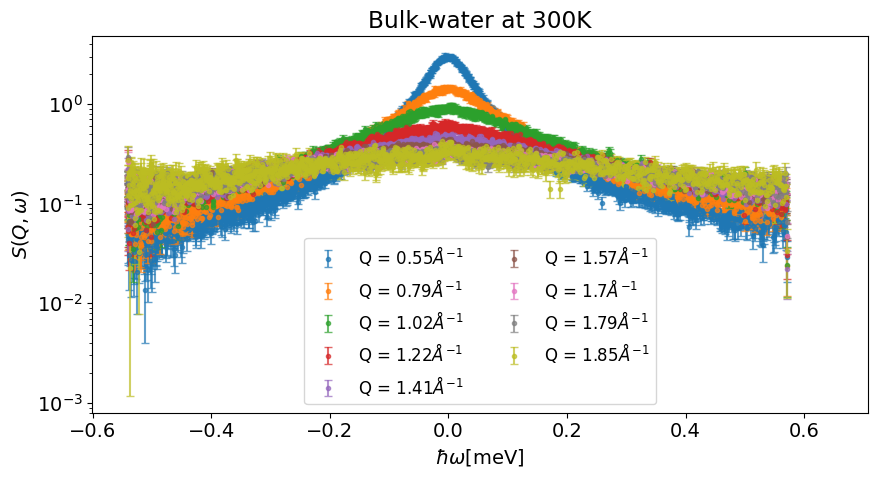

In [5]:
# Read data from data file
df = pd.read_csv('Data/H20_IRIS_300K_nosub.csv',delimiter=';')

# Load data
Q_index = df[' E '].isna()
Ndata = len(Q_index)
h2o300k_Q = df['# X '].values[Q_index] 

h2o300k_omega = np.array(np.split(df['# X '].values,np.arange(0,Ndata)[Q_index])[1:])[:,1:]
h2o300k_sqw = np.array(np.split(df[' Y '].values,np.arange(0,Ndata)[Q_index])[1:])[:,1:]
h2o300k_sqwerror = np.array(np.split(df[' E '].values,np.arange(0,Ndata)[Q_index])[1:])[:,1:]

Q = h2o300k_Q
omega = h2o300k_omega[0]
NQ = len(Q)
Nomega = len(omega)
print(Q)

# Plot data
inches_to_cm = 2.54
figsize = (20/inches_to_cm, 10/inches_to_cm)
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(9,5))
for i in range(len(Q)):
    ax.errorbar(h2o300k_omega[i],h2o300k_sqw[i],yerr=h2o300k_sqwerror[i],capsize = 3,alpha=0.7,fmt='.',label='Q = '+str(np.round(h2o300k_Q[i],2))+'$Å^{-1}$' )

ax.set(xlabel='$\hbar \omega$[meV]',ylabel='$S(Q,\omega)$',yscale='log',title='Bulk-water at 300K')
ax.legend(loc = 'best',ncol=2, prop = {'size':12})
fig.tight_layout()

In [6]:
# Read data from data file
df = pd.read_csv('Data/vana_IRIS_nosub.csv',delimiter=';')

# Load data
Q_index = df[' E '].isna()
Ndata = len(Q_index)
vana_Q = df['# X '].values[Q_index]
vana_omega = np.array(np.split(df['# X '].values,np.arange(0,Ndata)[Q_index])[1:])[:,1:]
vana_sqw = np.array(np.split(df[' Y '].values,np.arange(0,Ndata)[Q_index])[1:])[:,1:]
vana_sqwerror = np.array(np.split(df[' E '].values,np.arange(0,Ndata)[Q_index])[1:])[:,1:]

In [9]:
h2o300k = Minimal_Model(h2o300k_sqw,vana_sqw,h2o300k_sqwerror,vana_sqwerror,Q,omega,'$H_2O$',index = 2,T = 300)

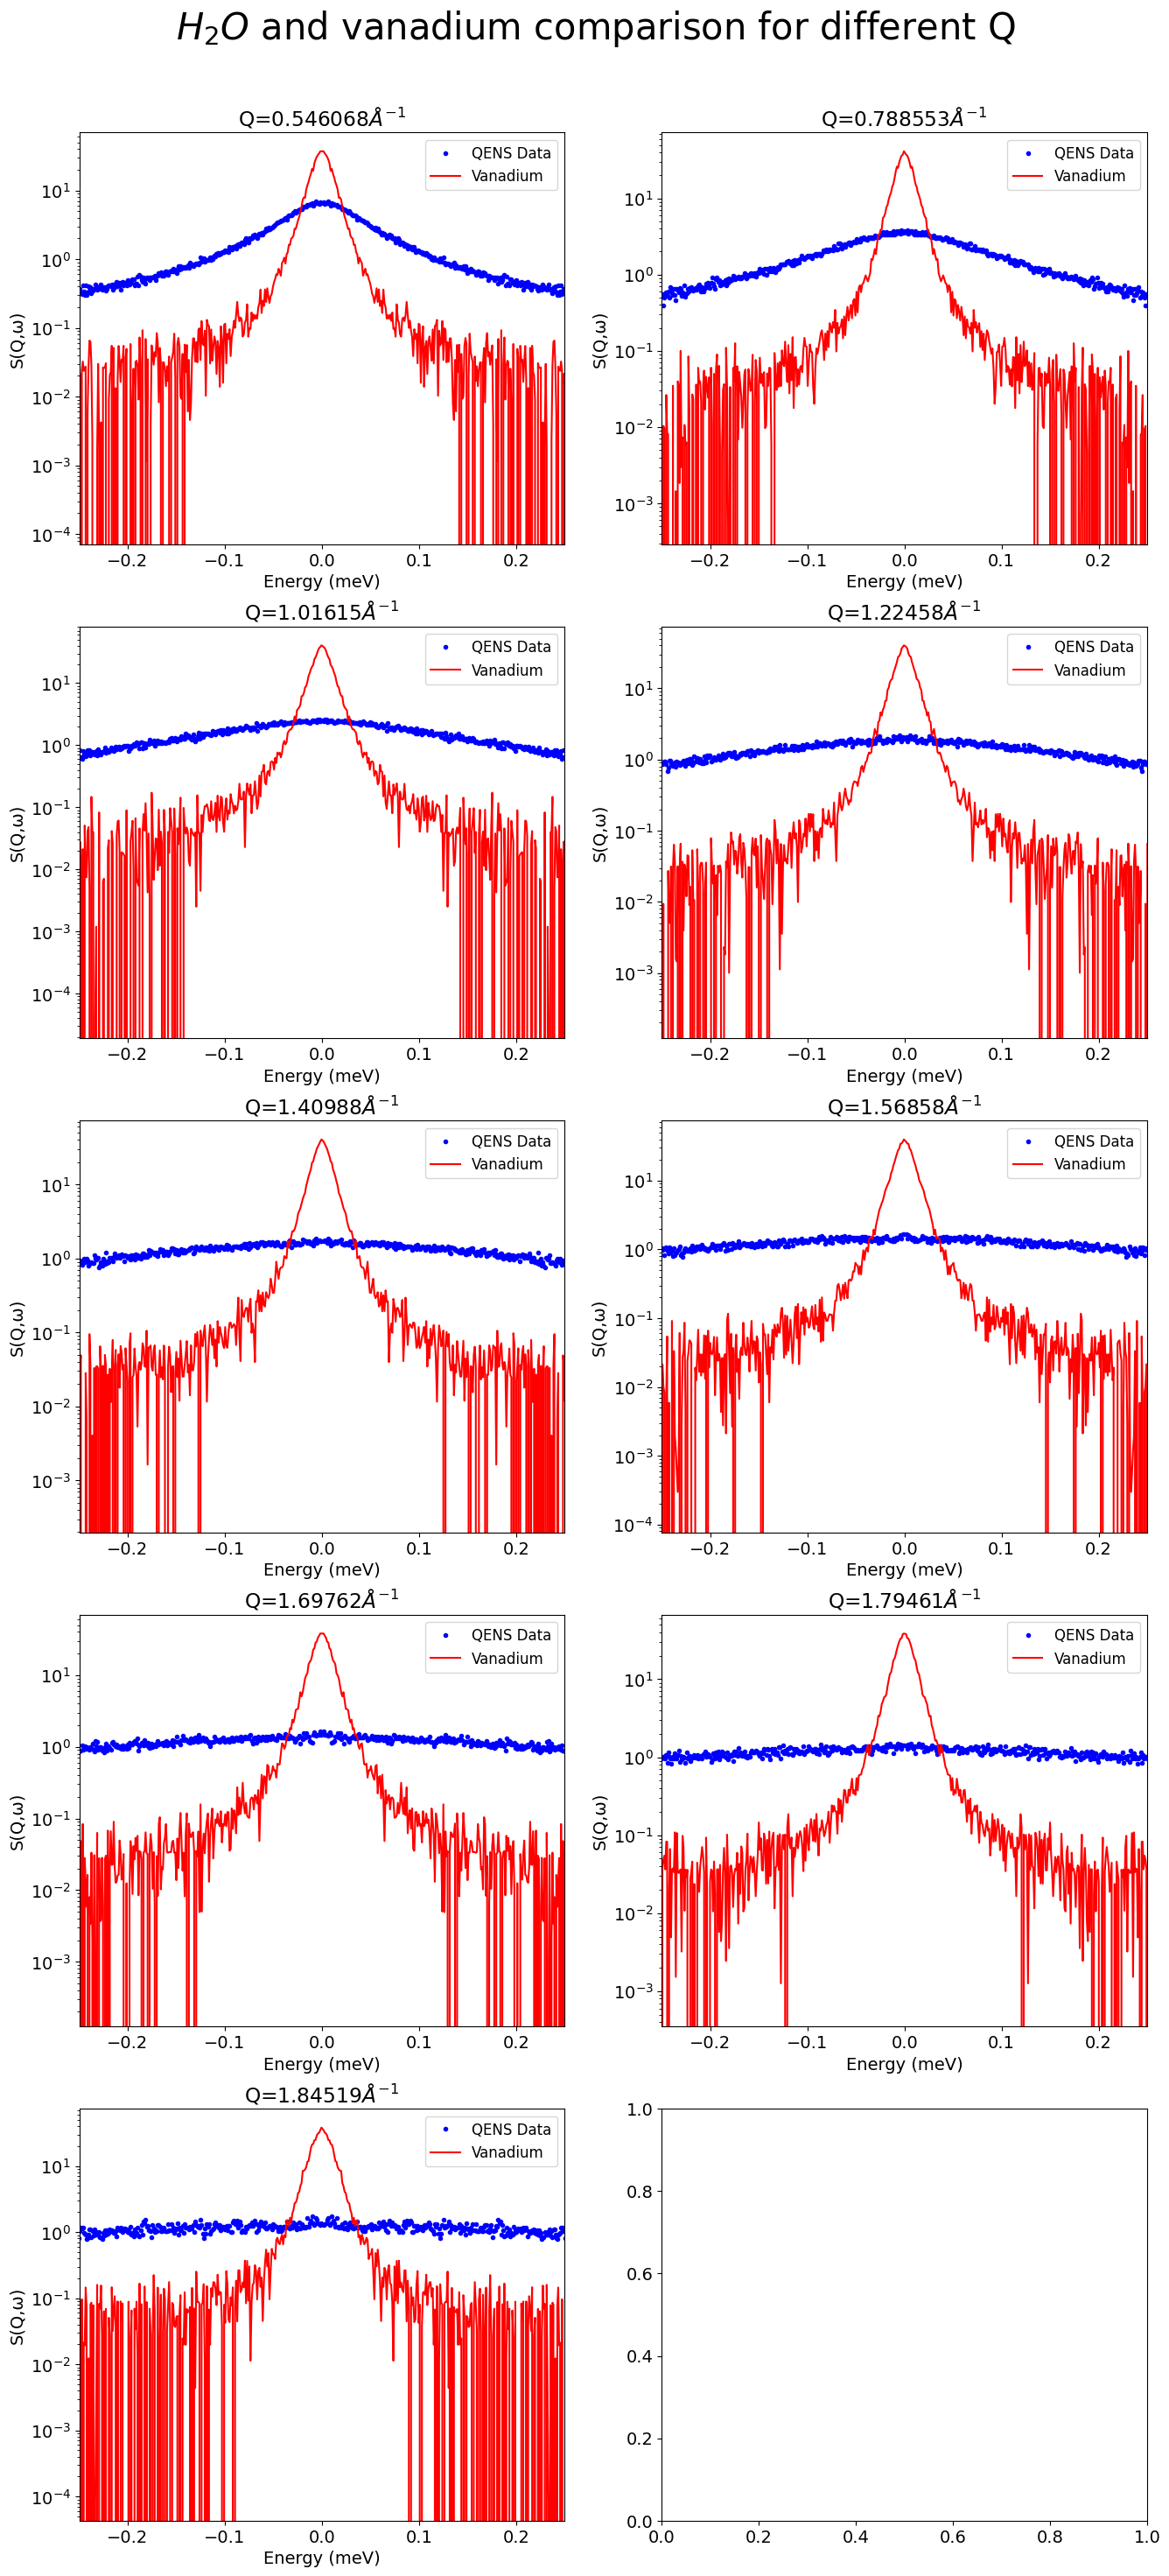

In [20]:
h2o300k.Sym_Norm()

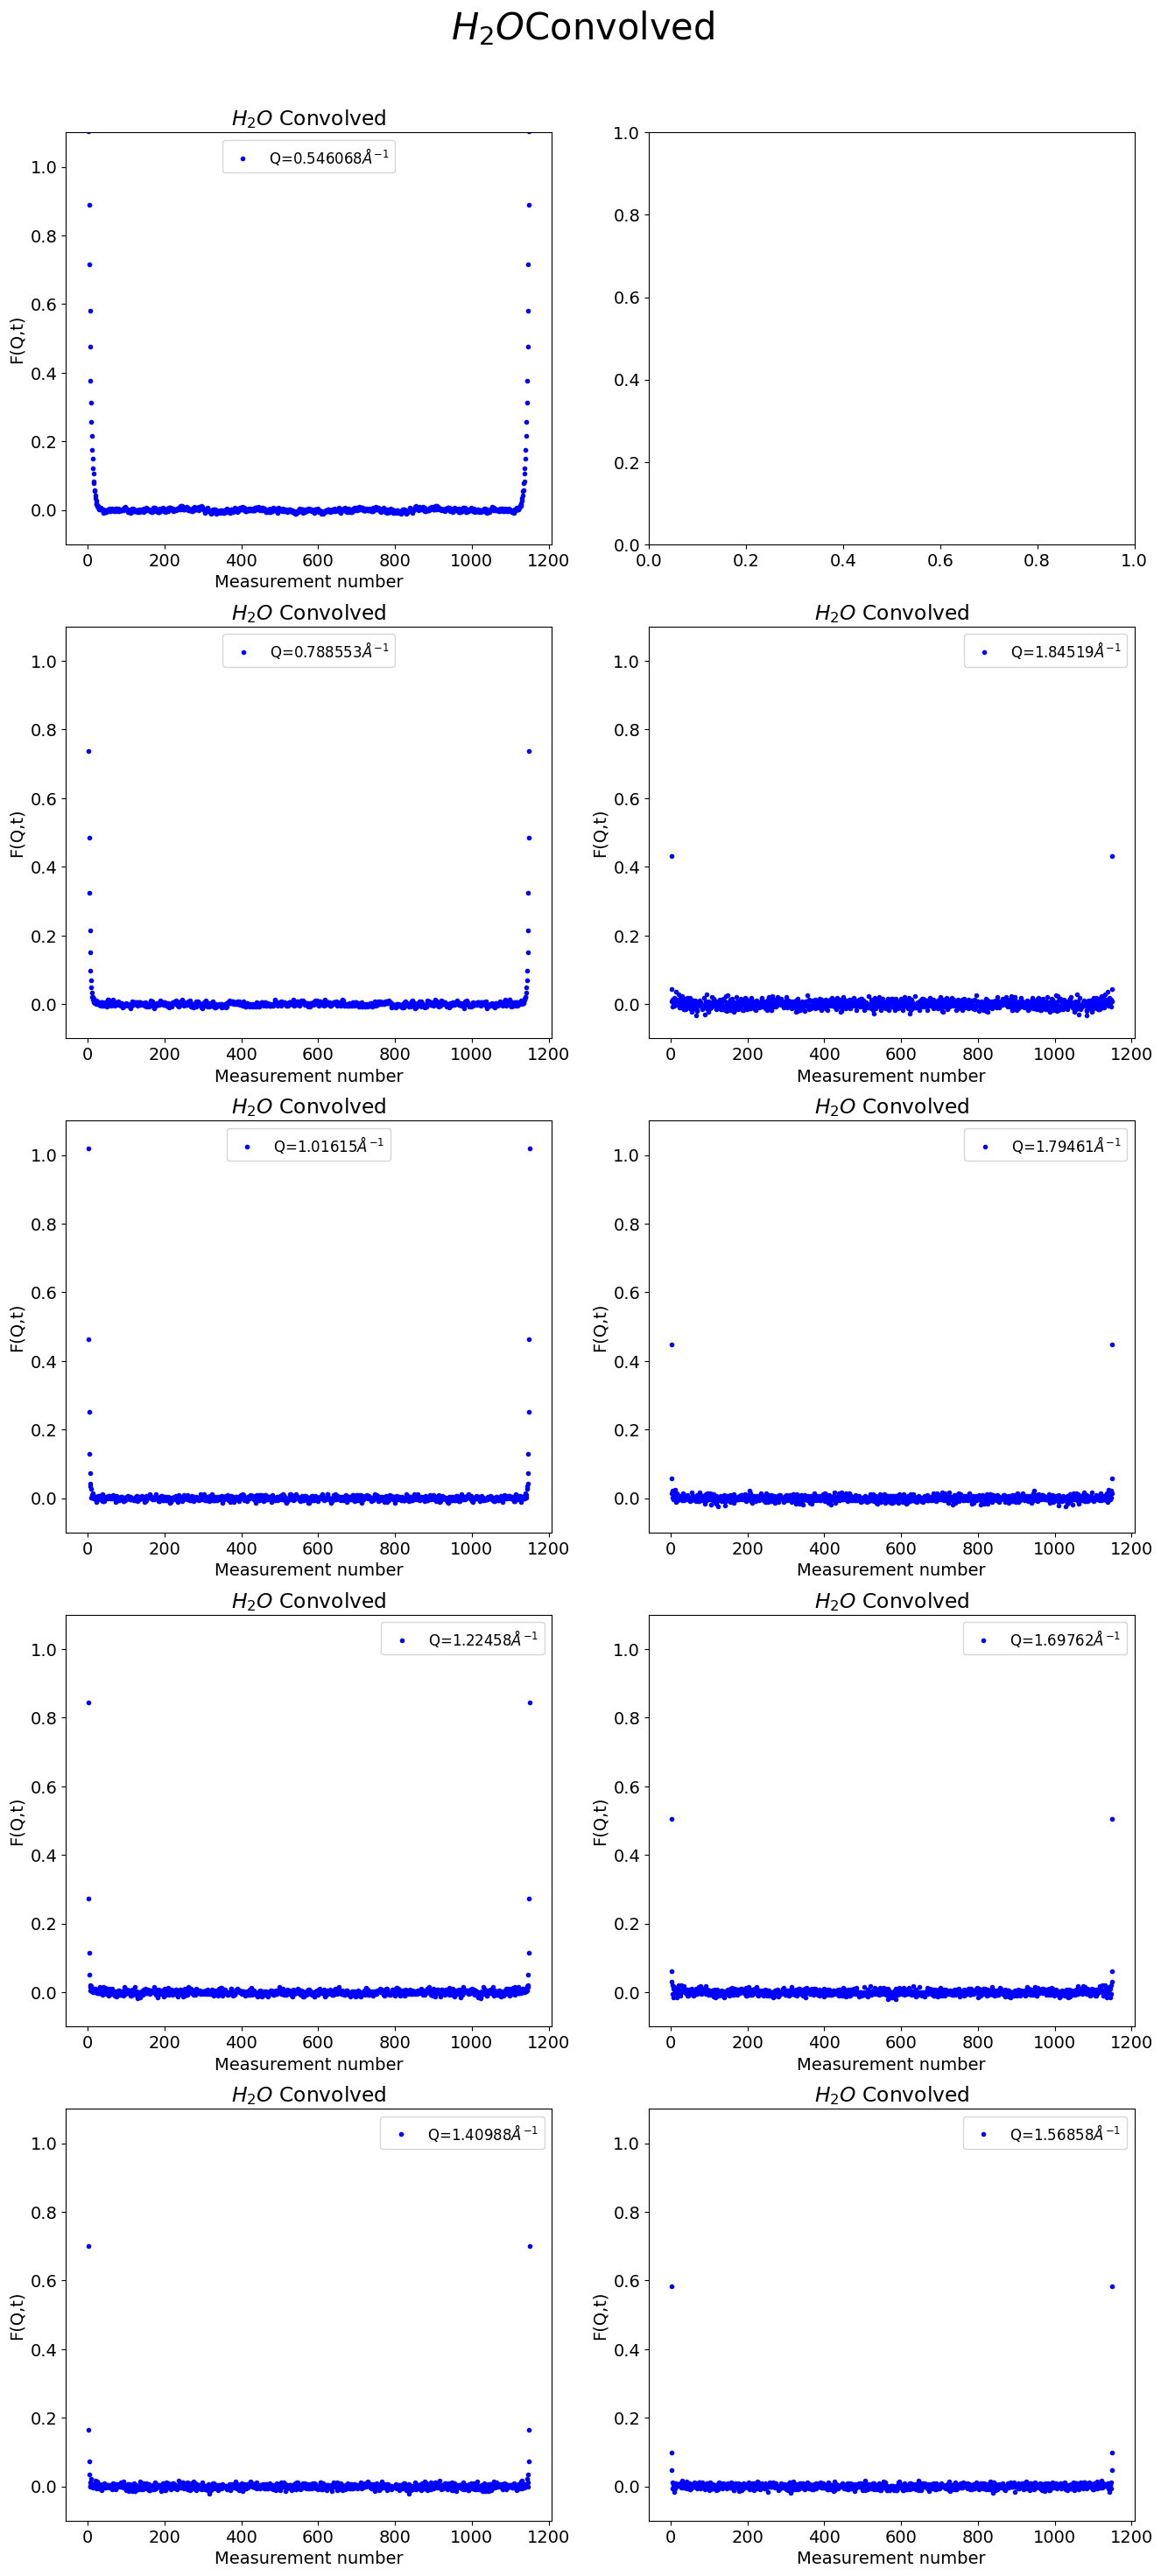

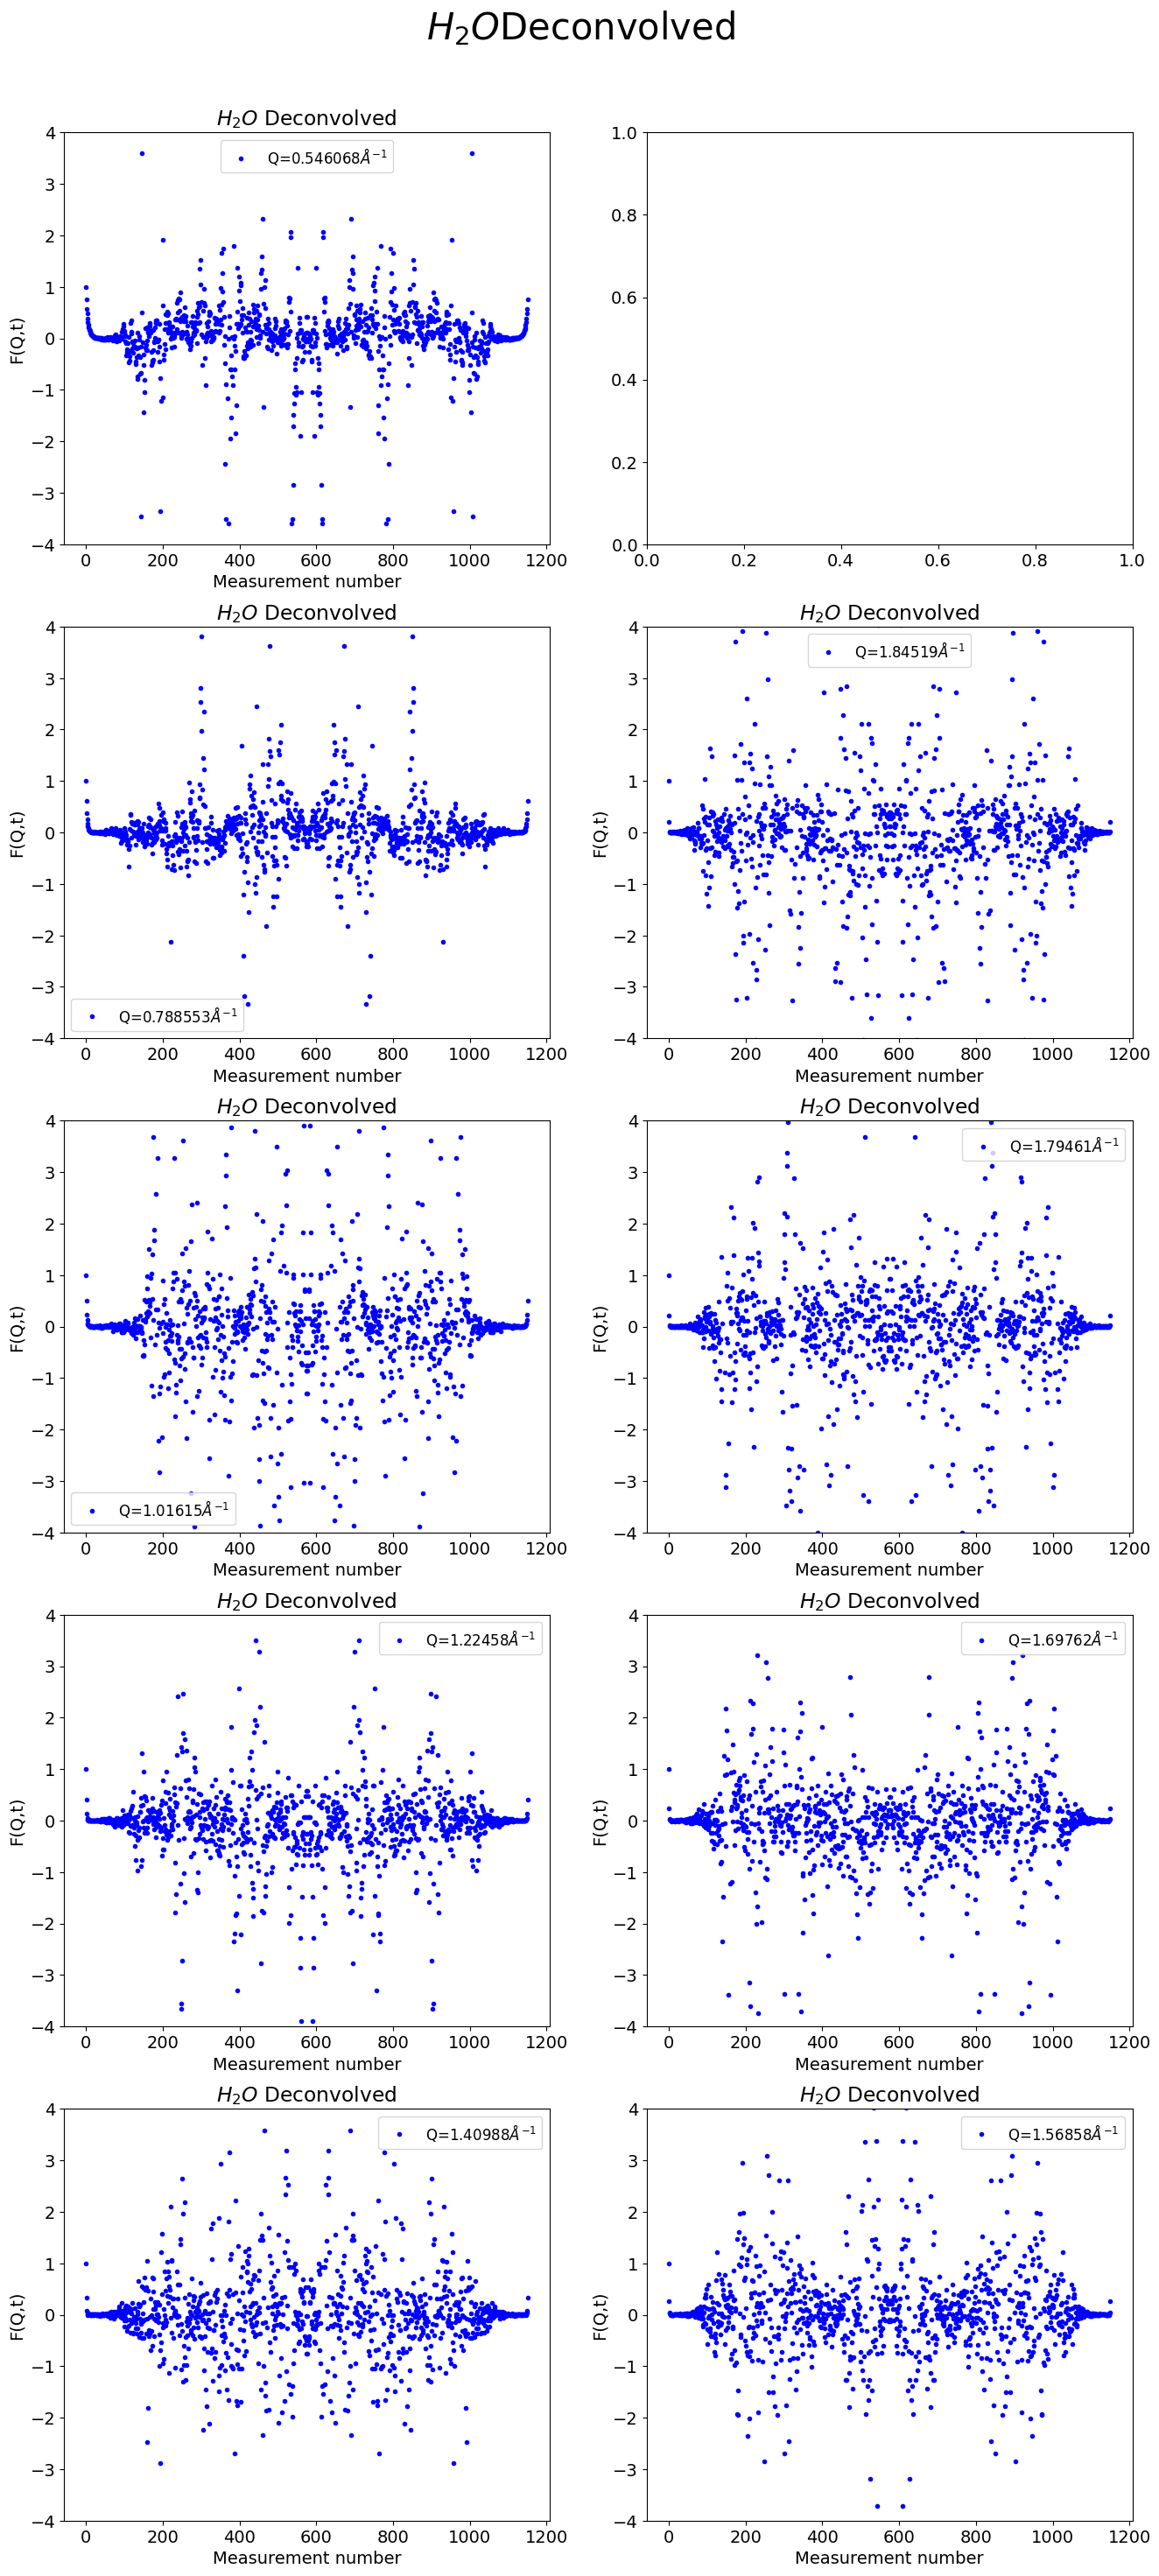

In [22]:
h2o300k.Deconvolve()

/Users/unikgyanu/anaconda3/lib/python3.12/site-packages/MMA_QENS/core.py:119: FutureWarning: make_func_code is deprecated: Use of ``func_code`` attribute to declare parameters is deprecated. Use ``_parameters`` instead, which is a dict of parameter names to limits.
  self.func_code = make_func_code(describe(self.f)[1:])


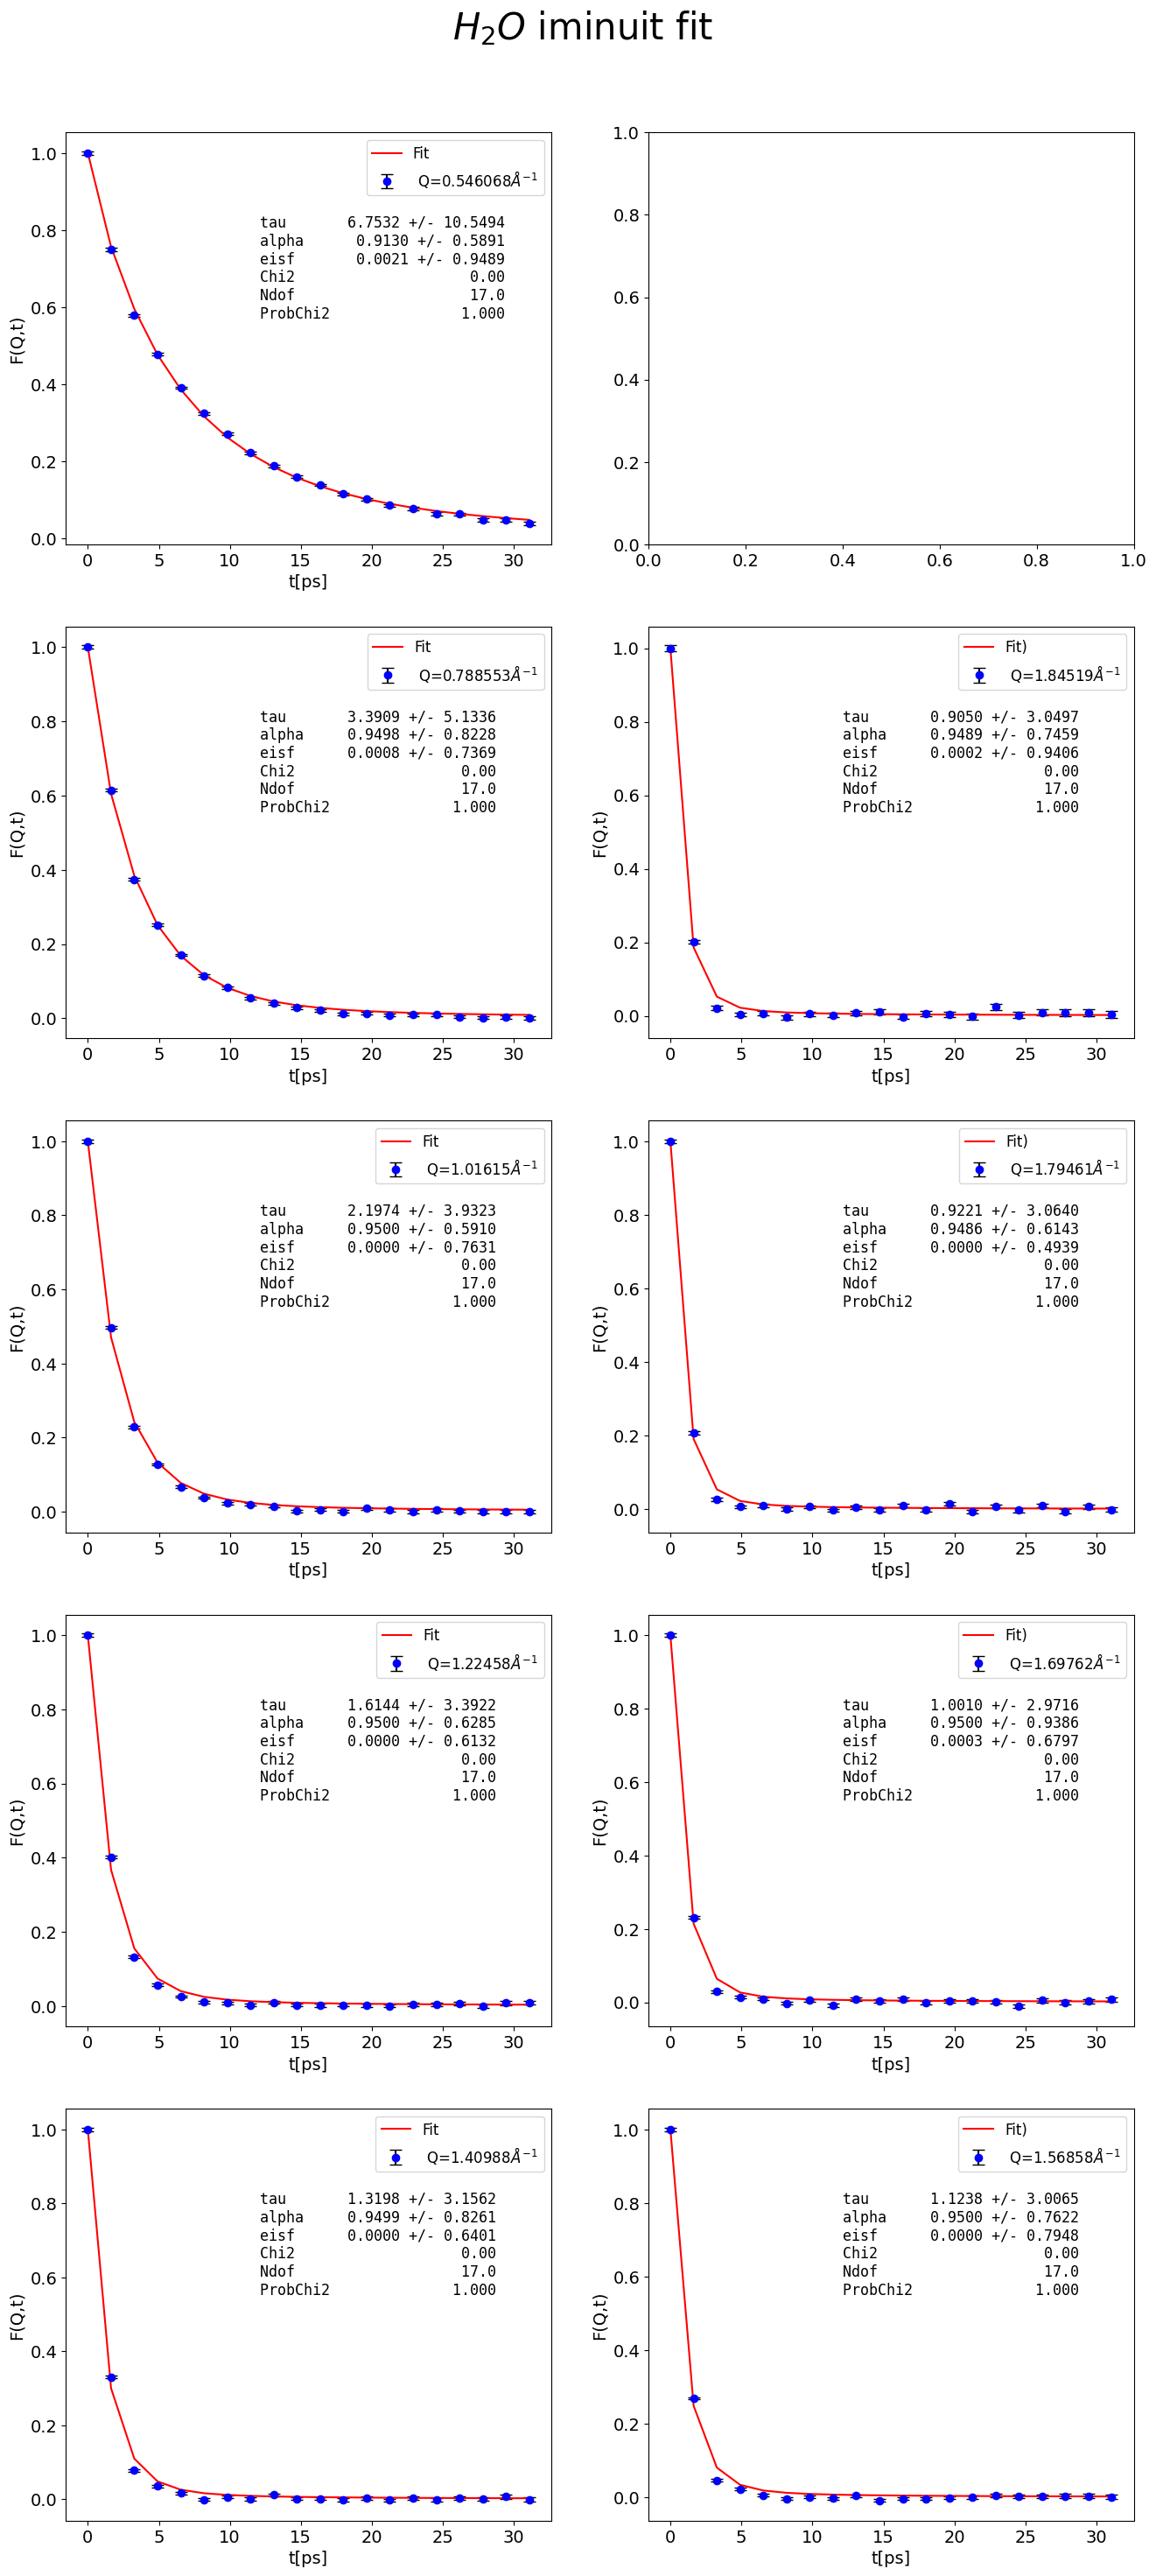

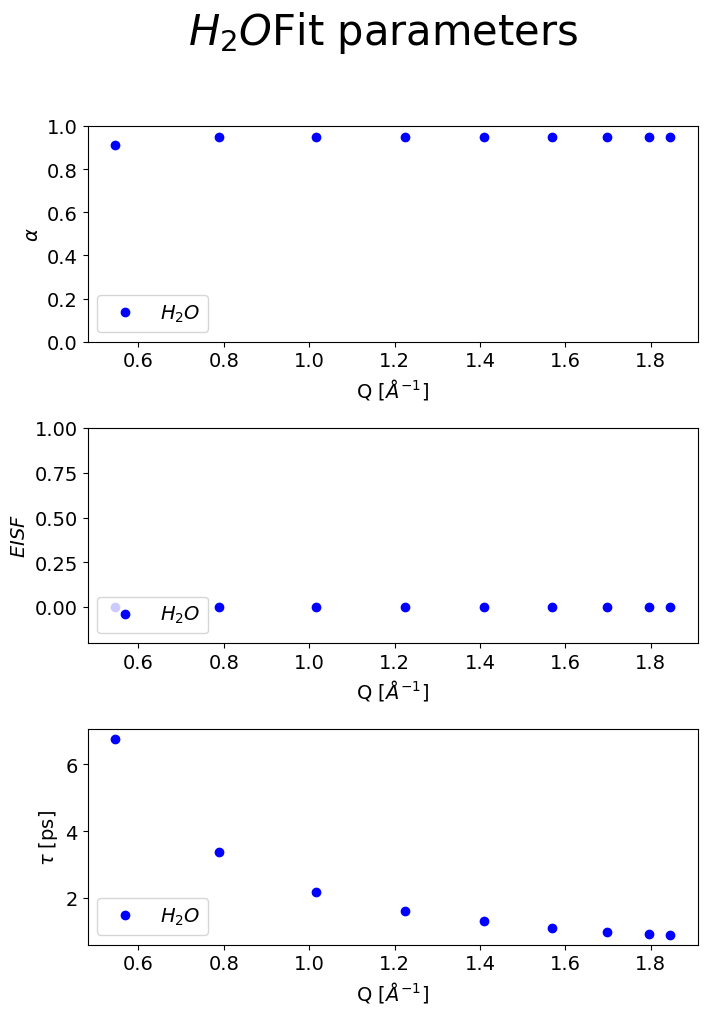

In [24]:
h2o300k.Fitting()

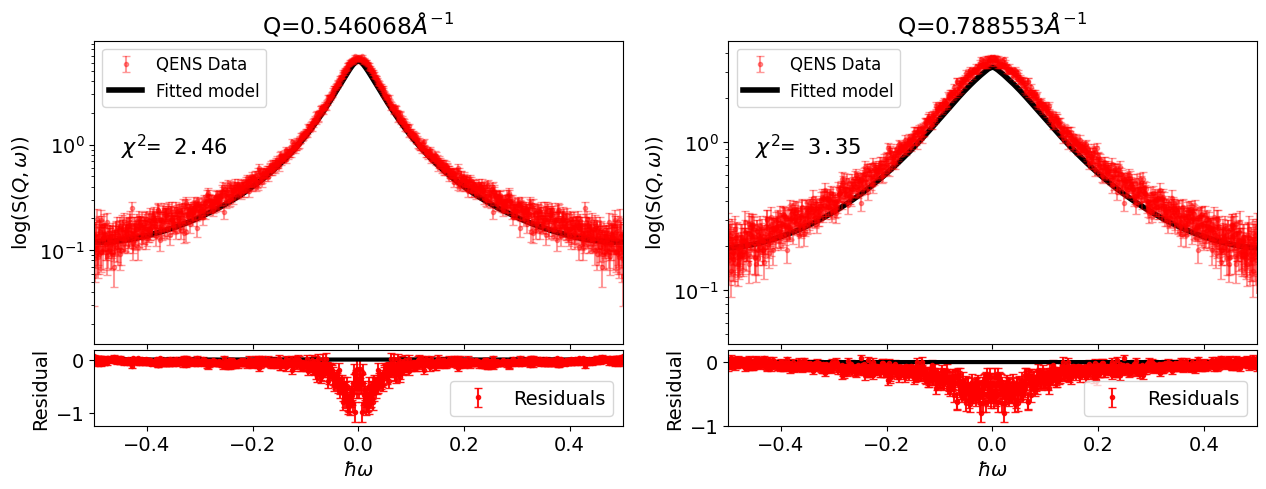

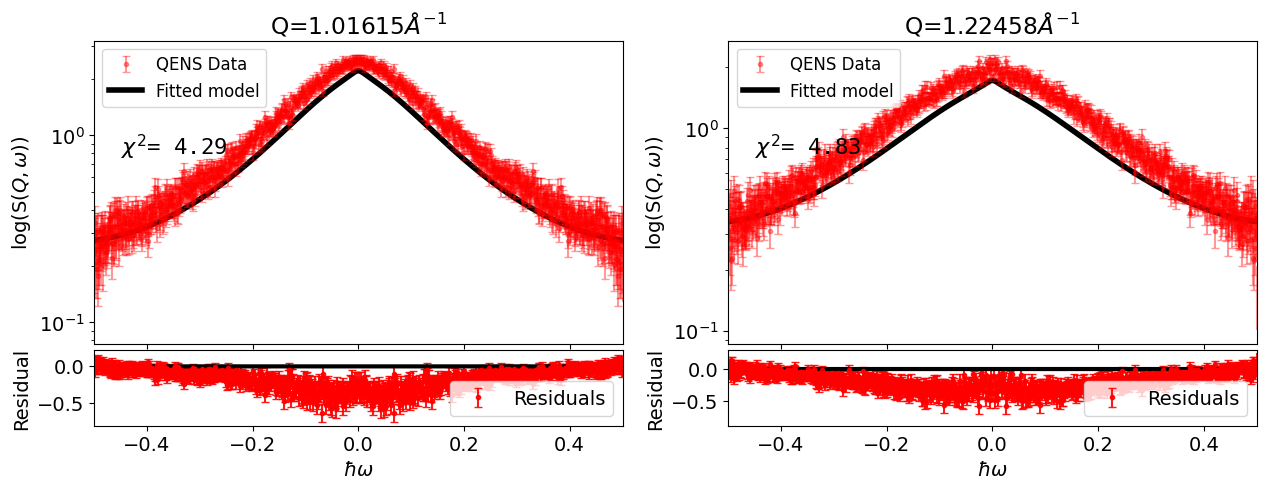

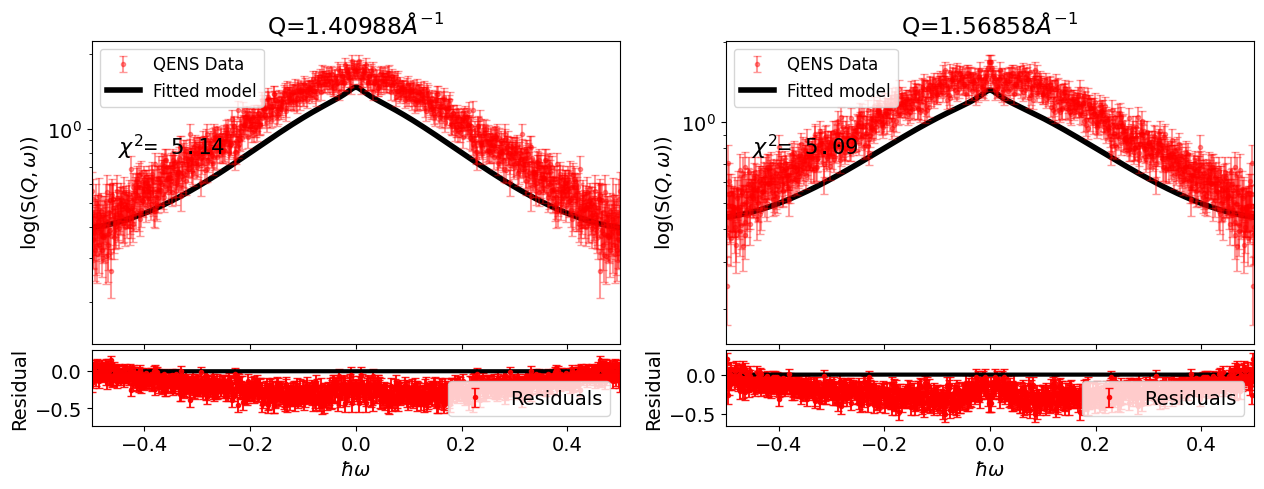

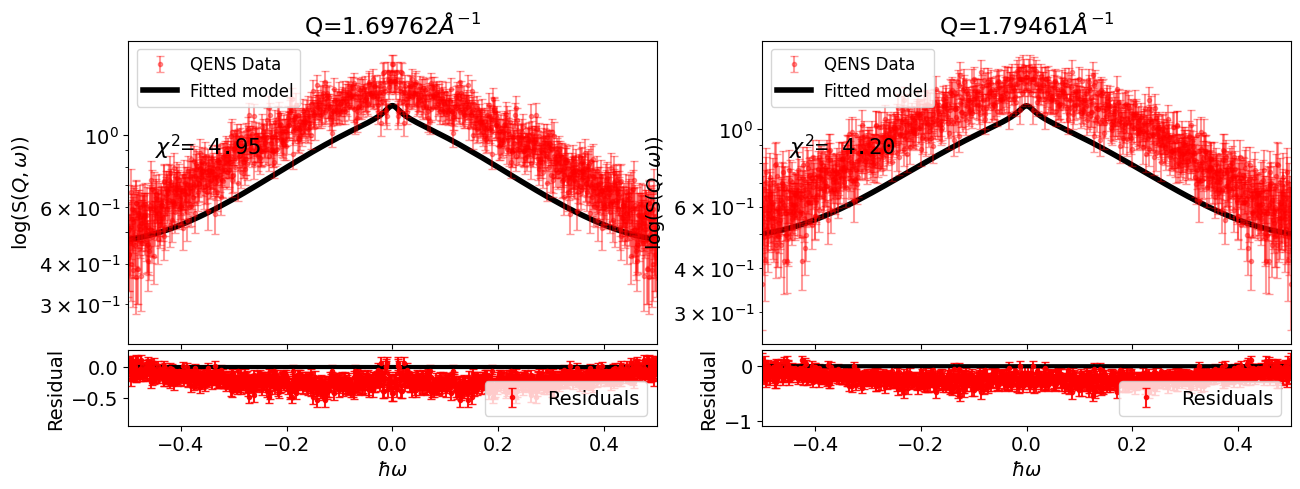

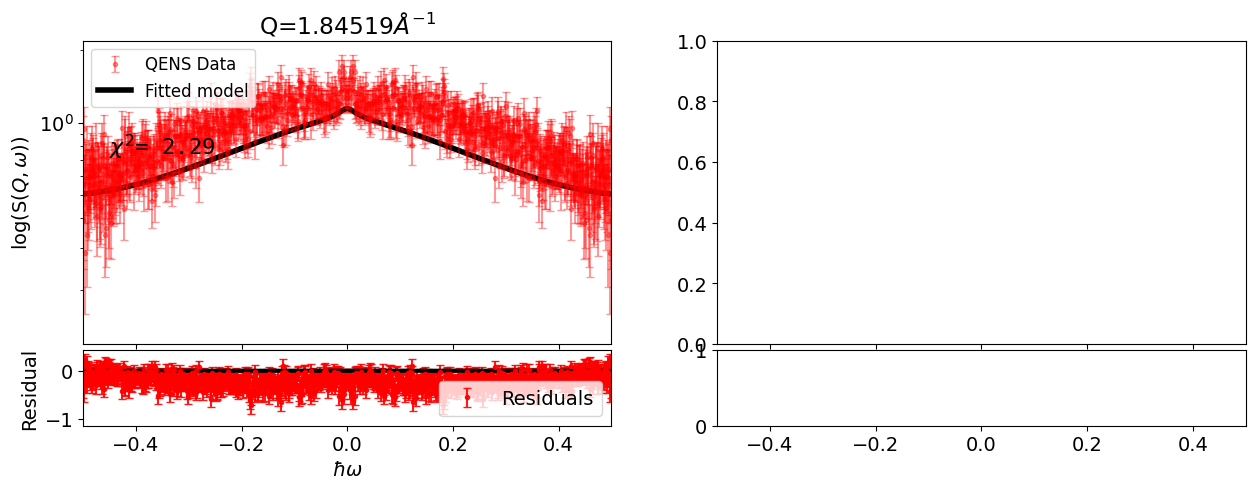

In [25]:
h2o300k.Resample()